Сегодня мы поговорим о восстановлении пропусков

In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 10
import numpy as np


In [0]:
HouseDataOriginal = pd.read_csv("https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/HousePrices/train.csv")
DataForPrediction = pd.read_csv("https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/HousePrices/test.csv")
HouseData = pd.read_csv("https://raw.githubusercontent.com/AVSirotkin/data_for_classes/master/HousePrices/train.csv")

In [0]:
HouseData.isna().sum()[HouseData.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [0]:
HouseData[HouseData.MasVnrType.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,...,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,...,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,...,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,...,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,...,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106,Unf,0,135,1241,GasA,...,Y,SBrkr,1241,0,0,1241,1,0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2,569,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386,Unf,0,690,2076,GasA,...,Y,SBrkr,2076,0,0,2076,1,0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3,850,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804,Unf,0,324,1128,GasA,...,Y,SBrkr,1128,903,0,2031,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,577,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [0]:
HouseData.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [0]:
HouseData.MasVnrArea.value_counts()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64

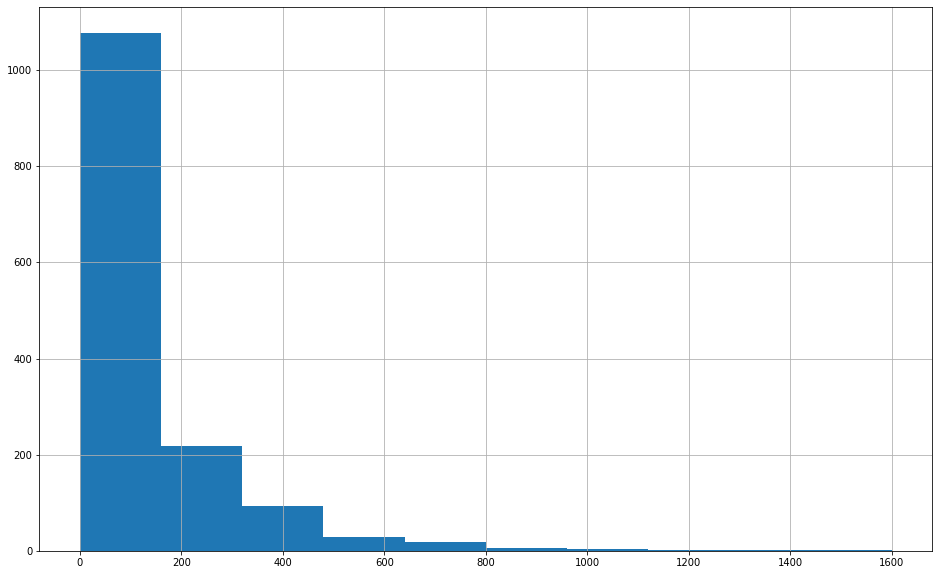

In [0]:
HouseData.MasVnrArea.hist()

In [0]:
HouseData.MasVnrArea.fillna(0, inplace = True)
HouseData.MasVnrType.fillna("None", inplace = True)

In [0]:
from sklearn.impute import SimpleImputer

In [0]:
HouseData.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [0]:
HouseData.BsmtCond.value_counts()

* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)

In [0]:
HouseData[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]].describe()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
count,1423,1423,1422,1423,1422
unique,4,4,4,6,6
top,TA,TA,No,Unf,Unf
freq,649,1311,953,430,1256


In [0]:
HouseData.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [0]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)
imp.fit(HouseData[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]])

SimpleImputer(add_indicator=False, copy=False, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

* If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
* If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
* If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.
* If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [0]:
HouseData[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]] = imp.transform(HouseData[["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]])

In [0]:
HouseData.BsmtFinType1.value_counts()

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [0]:
HouseData.isna().sum()[HouseData.isna().sum()>0]

LotFrontage      259
Alley           1369
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [0]:
HouseDataOriginal.isna().sum()[HouseDataOriginal.isna().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [0]:
HouseData["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

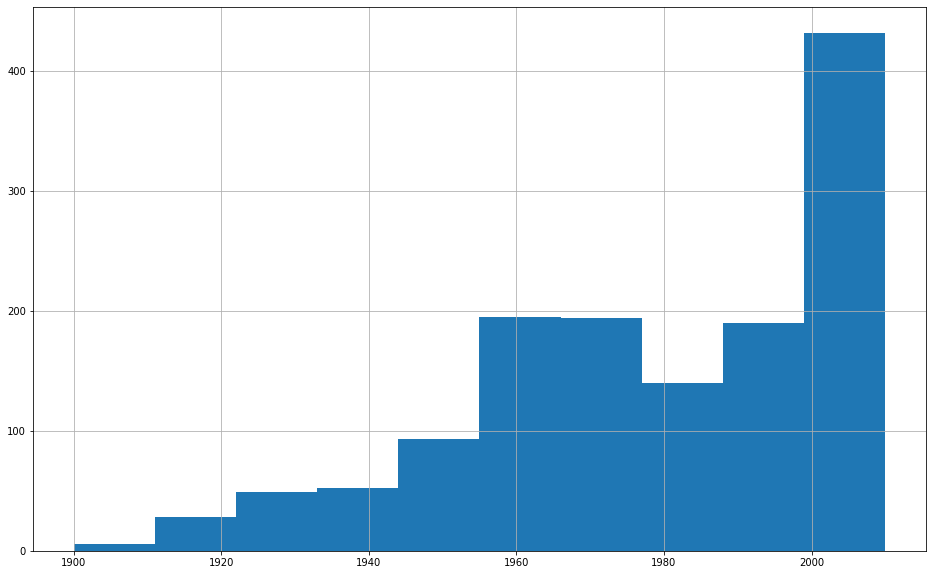

In [0]:
HouseData["GarageYrBlt"].hist()       

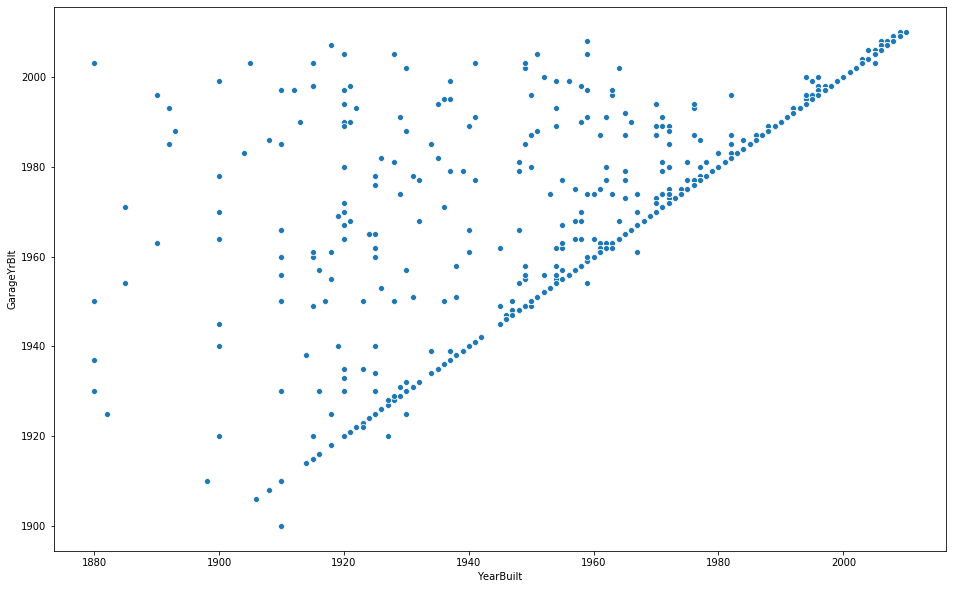

In [0]:
sns.scatterplot("YearBuilt", "GarageYrBlt", data = HouseData)

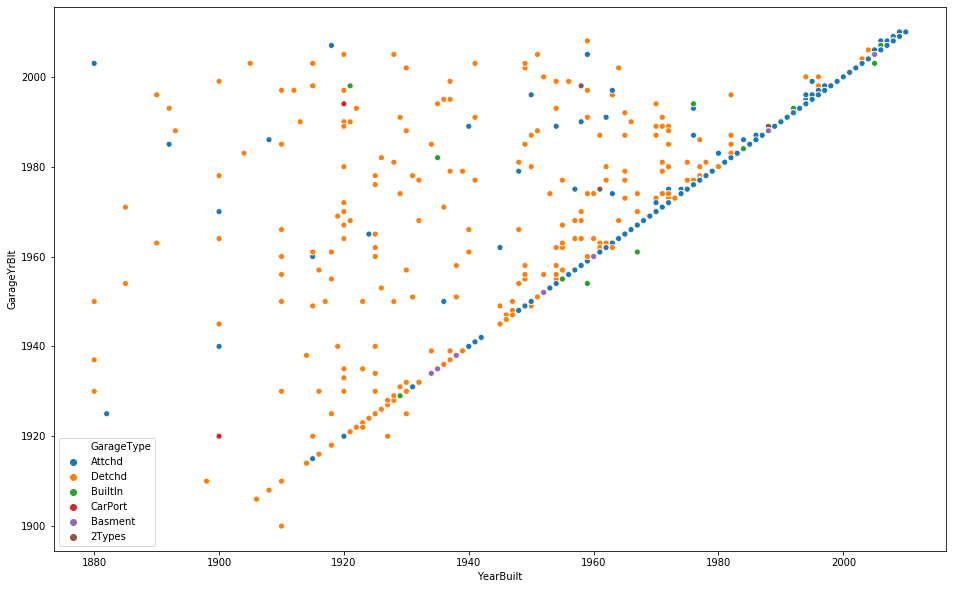

In [0]:
sns.scatterplot("YearBuilt", "GarageYrBlt", data = HouseData, hue = "GarageType" )

In [0]:
HouseData["GarageType"].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [0]:
HouseData["GarageFinish"].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [0]:
HouseData["GarageQual"].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [0]:
HouseData["GarageCond"].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [0]:
impG = SimpleImputer(missing_values=np.nan, strategy='most_frequent', copy=False)
impG.fit(HouseData[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]])
HouseData[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]] = impG.transform(HouseData[["GarageType", "GarageFinish", "GarageQual", "GarageCond"]])

In [0]:
HouseData["GarageYrBlt"][HouseData["GarageYrBlt"].isna()] = HouseData[HouseData["GarageYrBlt"].isna()]["YearBuilt"]   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
HouseData[HouseData["GarageYrBlt"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [0]:
HouseData.isna().sum()[HouseData.isna().sum()>0]

LotFrontage      259
Alley           1369
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

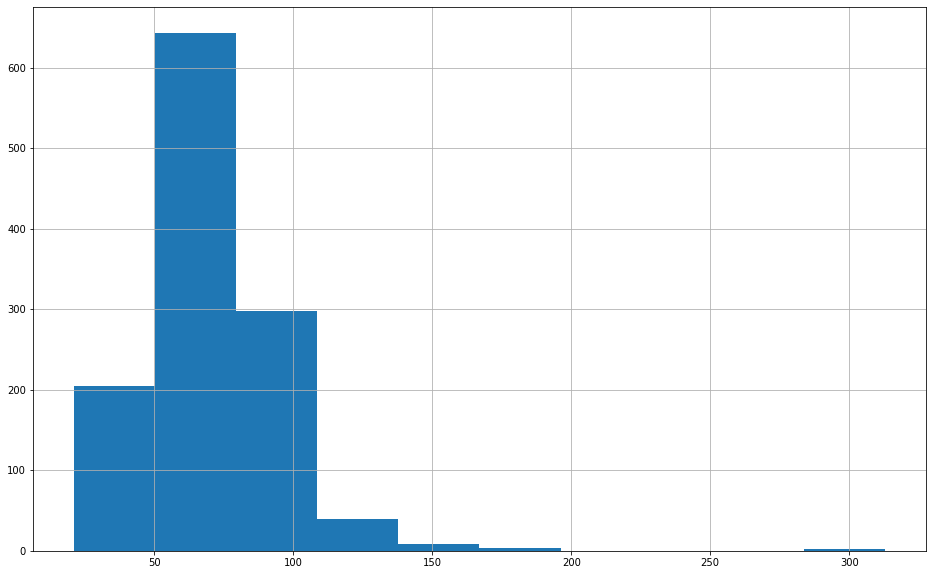

In [0]:
HouseData["LotFrontage"].hist()

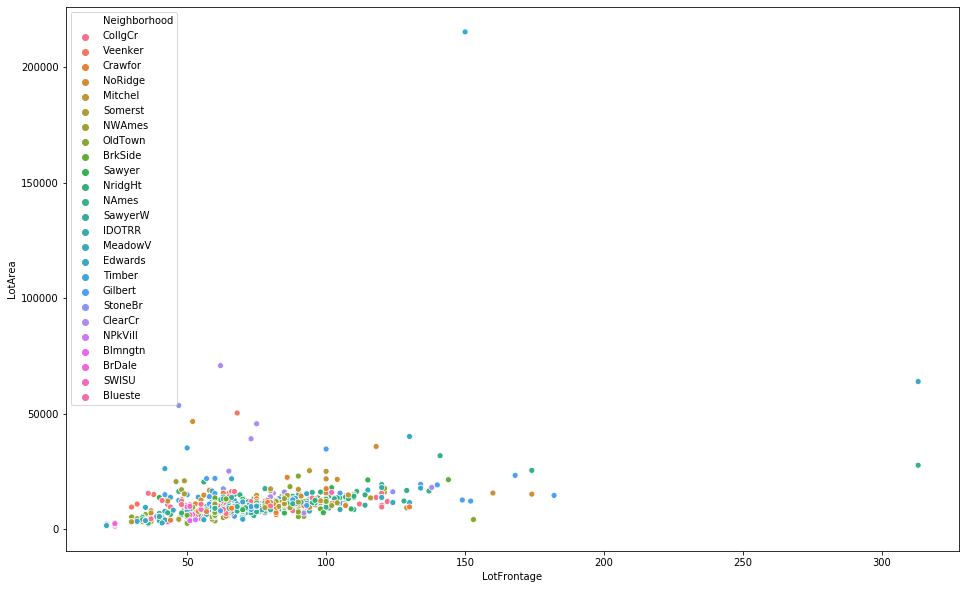

In [0]:
sns.scatterplot(HouseData["LotFrontage"], HouseData["LotArea"], hue = HouseData["Neighborhood"])

In [0]:
HouseData["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [0]:
HouseData["Neighborhood"][HouseData["LotFrontage"].isna()].value_counts()

NAmes      39
Gilbert    30
NWAmes     28
Sawyer     26
CollgCr    24
ClearCr    15
Mitchel    13
Crawfor    10
SawyerW     9
Somerst     8
Timber      8
Edwards     8
NoRidge     8
BrkSide     7
StoneBr     5
OldTown     4
Veenker     4
IDOTRR      3
Blmngtn     3
SWISU       2
NPkVill     2
MeadowV     2
NridgHt     1
Name: Neighborhood, dtype: int64

Постепенно появляются более продвинутые варианты. 

In [0]:
HouseData['LotFrontage'] = HouseData.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

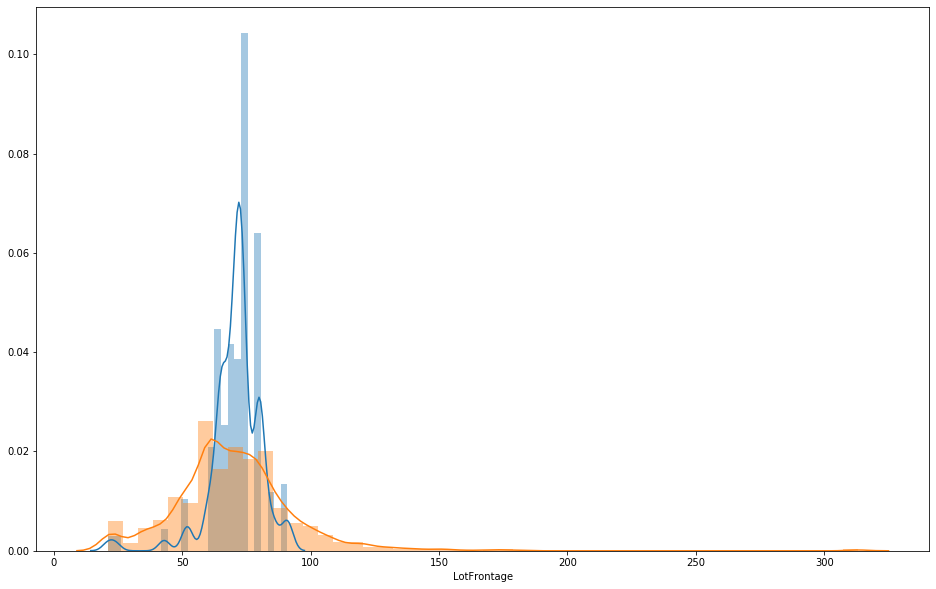

In [0]:
sns.distplot(HouseData['LotFrontage'][HouseDataOriginal['LotFrontage'].isna()])
sns.distplot(HouseData['LotFrontage'][~HouseDataOriginal['LotFrontage'].isna()])

In [0]:
HouseDataOriginal['Neighborhood'] in Neighbourhood_with_na

In [0]:
HouseData.isna().sum()[HouseData.isna().sum()>0]

Alley           1369
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [0]:
HouseData["FireplaceQu"].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

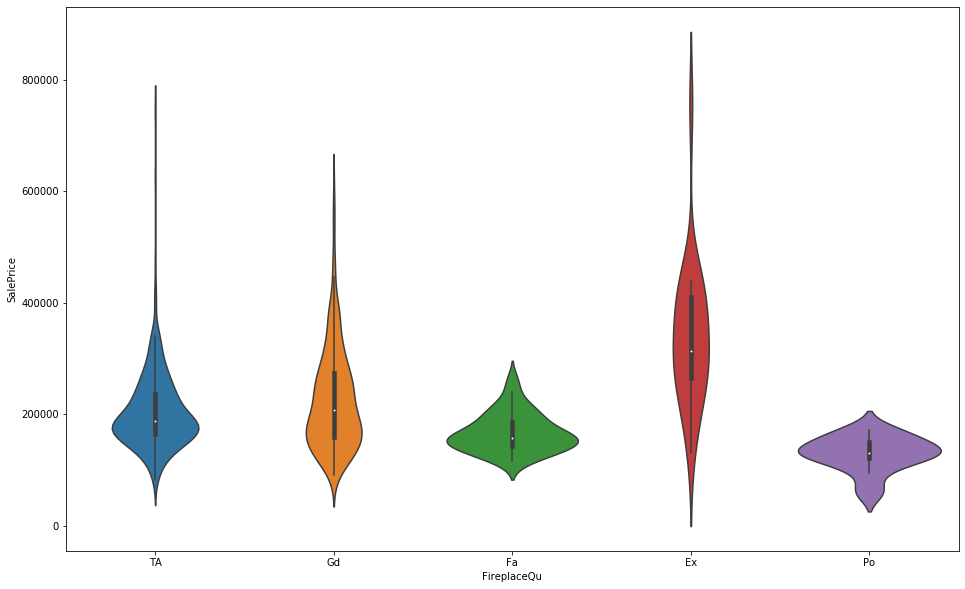

In [0]:
sns.violinplot(x="FireplaceQu", y="SalePrice", data=HouseData);

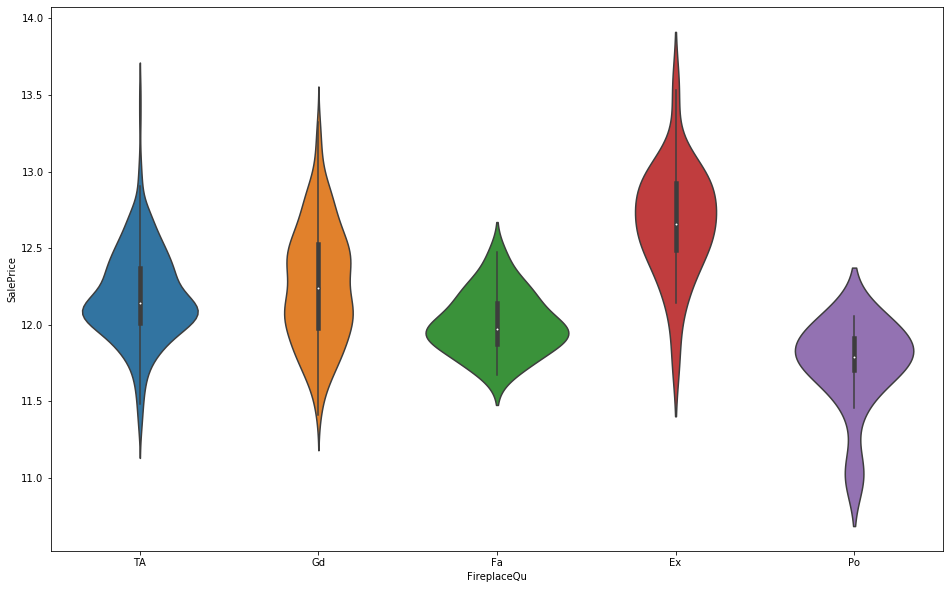

In [0]:
sns.violinplot(x=HouseData["FireplaceQu"], y=np.log(HouseData["SalePrice"]))

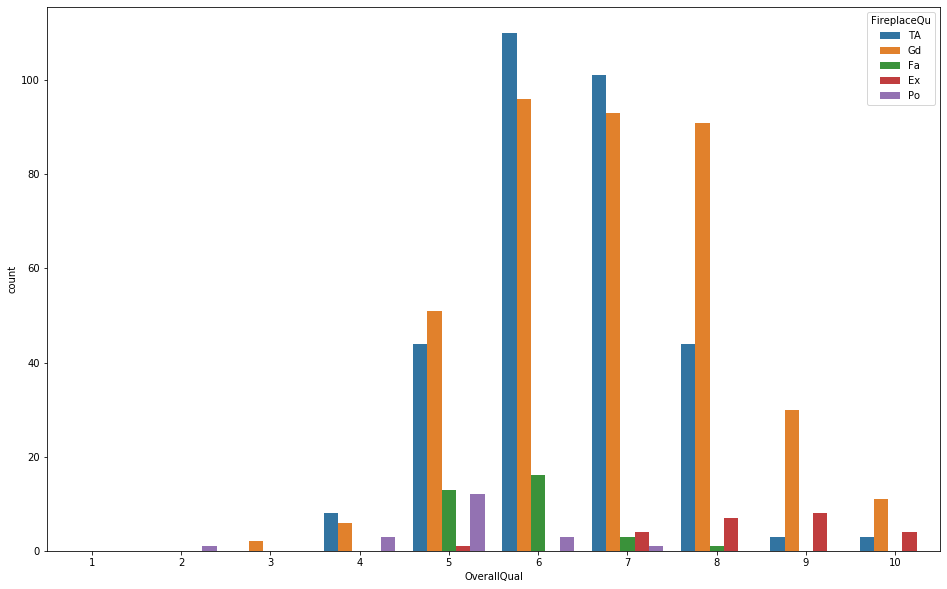

In [0]:
sns.countplot(x='OverallQual', hue='FireplaceQu', data=HouseData);

In [0]:
HouseData.Fireplaces[HouseData.FireplaceQu.isna()].value_counts()

0    690
Name: Fireplaces, dtype: int64

In [0]:
HouseData.FireplaceQu.fillna("None", inplace=True)

In [0]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [0]:
df =  pd.DataFrame({"x1":[1 , 2, 3, np.nan, 5], "x2": [2, 4, np.nan, 8, 10]})

In [0]:
df

,x1,x2
0,1.0,2.0
1,2.0,4.0
2,3.0,NaN
3,NaN,8.0
4,5.0,10.0


In [0]:
it = IterativeImputer()

In [0]:
it.fit(df)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=None,
                 sample_posterior=False, tol=0.001, verbose=0)

In [0]:
it.transform(df)

array([[ 1.        ,  2.        ],
       [ 2.        ,  4.        ],
       [ 3.        ,  6.00025309],
       [ 3.99996375,  8.        ],
       [ 5.        , 10.        ]])

In [0]:
df2 =  pd.DataFrame({"x1":[1 , 2, 3, np.nan, 5], "x2": [1, 4, np.nan, 16, 25]})

In [0]:
it.fit_transform(df2)

array([[ 1.        ,  1.        ],
       [ 2.        ,  4.        ],
       [ 3.        , 12.1064648 ],
       [ 3.60954098, 16.        ],
       [ 5.        , 25.        ]])

In [0]:
df3 =  pd.DataFrame({"x1":[1 , 2, 3, np.nan, 5], "x2": [1, 4, np.nan, 16, 25], "x3": [2, 4, 6, 8, np.nan]})

In [0]:
IterativeImputer().fit_transform(df3)

/usr/local/lib/python3.6/dist-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ordered_idx = self._get_ordered_idx(mask_missing_values)


array([[ 1.        ,  1.        ,  2.        ],
       [ 2.        ,  4.        ,  4.        ],
       [ 3.        , 11.22309076,  6.        ],
       [ 3.88727579, 16.        ,  8.        ],
       [ 5.        , 25.        , 10.49452008]])

In [0]:
!pip install --force sklearn

     |████████████████████████████████| 7.0MB 2.8MB/s 
     |████████████████████████████████| 25.2MB 90kB/s 
     |████████████████████████████████| 20.0MB 116kB/s 
     |████████████████████████████████| 296kB 56.8MB/s 
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=4764292d3205e1d1bd10f051ec1761d6626ac72f83be24df0f55c10d4f61ae1c
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.17.4
    Uninstalling numpy-1.17.4:
      Successfully uninstalled numpy-1.17.4
  Found existing installation: scipy 1.3.3
    Uninstalling scipy-1.3.3:
      Successfully uninstalled scipy-1.3.3
  Found existing installatio

In [0]:
from sklearn.impute import KNNImputer

In [0]:
KNN_imp = KNNImputer(n_neighbors = 3)
KNN_imp.fit_transform(df2)

array([[ 1.        ,  1.        ],
       [ 2.        ,  4.        ],
       [ 3.        , 10.        ],
       [ 2.66666667, 16.        ],
       [ 5.        , 25.        ]])

Немного об альтернативах. Мы можем обучить произвольную модель (наприммер дерево) и использовать ее для пронозов пропущеных значени.

Восстановите несколькими способами LotFrontage и сравните результаты. Для контроля можно удалить несколько значений самостоятельно и восстановить их.

In [0]:
KNN_imp.fit_transform(df3)

array([[ 1.        ,  1.        ,  2.        ],
       [ 2.        ,  4.        ,  4.        ],
       [ 3.        , 15.        ,  6.        ],
       [ 3.33333333, 16.        ,  8.        ],
       [ 5.        , 25.        ,  6.        ]])